In [24]:
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
import time

consumer_key = "YQiJRiTKjEWq9XiGJZV7qBD9Q"
consumer_secret = "2lTcEcdT2pSV9fXcWXlAYZzQqGWgHB9u08iFvcXv6KmqkY53VO"
access_token = "927693796472696832-rnN6kWx7qJ8bFjYJK32ipIpMtauu24Z"
access_token_secret = "MSZNRckC59vdOHpJpq0crbvO49FMeiDb0LgaUXXo20ReV"

def cria_arquivo(nome):6
    arquivo = open('twitter_data'+nome+'.json', 'w')
    arquivo.close()

def escreve_no_arquivo( data):
    arquivo = open('twitter_data10.json', 'a') 
    arquivo.write(data)
    arquivo.close()

    
class StdOutListener(StreamListener):
    def on_data(self, data):
        escreve_no_arquivo( data)
        return True

    def on_error(self, status):
        print (status)


if __name__ == '__main__':

    cria_arquivo('newFile')
    l = StdOutListener()
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
     
    while True:
        try:
            stream = Stream(auth, l)
            stream.filter(track=['jogos', 'games', 'jogabilidade','gameplay', 'playability', 'jogo', 'game'])
        except:
            print("esperando os 2 minutos")
            time.sleep(120)
            print("concluido os 2 minutos")
            continue
        

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

tweets_data1a5 = []
tweets_data6a10 = []

In [2]:
tweets_data_path = 'C:/Users/JuniorF/Python_Jupyter/twitter_data2.json'

tweets_file = open(tweets_data_path, "r")

for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data1a5.append(tweet)
    except:
        continue
#jsonData = json.dumps(tweets_data)


In [15]:
tweets_data_path = 'C:/Users/JuniorF/Python_Jupyter/twitter_data7.json'

tweets_file = open(tweets_data_path, "r")

for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data6a10.append(tweet)
    except:
        continue
#jsonData = json.dumps(tweets_data)


In [16]:
tweets_data = tweets_data1a5 + tweets_data6a10

In [17]:
print(len(tweets_data1a5), '+', len(tweets_data6a10), '=', len(tweets_data))

18333 + 18346 = 36679


In [3]:
tweets = pd.DataFrame()


In [4]:
import re
tweets['text'] = [tweet.get('text','') for tweet in tweets_data1a5]

tweets['lang'] = [tweet.get('lang','') for tweet in tweets_data1a5]


In [13]:
def word_in_text(word, text):
    word = word.lower()
    texto = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

def in_country(word, text):
    match = re.search(word, text)
    if match:
        return True
    return False

tweets['jogos'] = tweets['text'].apply(lambda tweet: word_in_text('jogos', tweet))
tweets['games'] = tweets['text'].apply(lambda tweet: word_in_text('games', tweet))
tweets['entreterimento'] = tweets['text'].apply(lambda tweet: word_in_text('entreterimento', tweet))
tweets['game'] = tweets['text'].apply(lambda tweet: word_in_text('game', tweet))
tweets['jogo'] = tweets['text'].apply(lambda tweet: word_in_text('jogo', tweet))
tweets['jogabilidade'] = tweets['text'].apply(lambda tweet: word_in_text('jogabilidade', tweet))
tweets['playability'] = tweets['text'].apply(lambda tweet: word_in_text('playability', tweet))
tweets['gameplay'] = tweets['text'].apply(lambda tweet: word_in_text('gameplay', tweet))

print (tweets[:200])

                                                  text lang  jogos  games  \
0    For $1/Mo you access unfiltered access to bonu...   en  False   True   
1    mashable : Winter is coming. Survive it with t...   en  False  False   
2    @RayeSimone88 Just to make you a little jealou...   en  False  False   
3            @gamingonlinux Kingdom rush is good game.   en  False  False   
4    RT @NarQosTheQue: #NCAT We gotta take more pri...   en  False   True   
5    RT @thrill333: Enough of the celebration. now ...   en  False  False   
6    Still at work. Watching my kids first basketba...   en  False  False   
7    RT @wsoctv: VOTE for this week's WSOC-TV High ...   en  False  False   
8    RT @JPosnanski: Guy catches ball over kid.\nMe...   en  False  False   
9    RT @zenkmm: @leimendoza466 @fleurs77541 @xinem...   en  False  False   
10   (Character Song) #IDOLiSH7 Game: Poisonous Gan...   en  False  False   
11   Enamel pin game is stronk. https://t.co/e8F8cw...   en  False  False   

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt


In [23]:
#cv = CountVectorizer(vocabulary=['games', 'jogos', 'entreterimento', 'game', 'jogo', 'jogabilidade', 'playability', 'gameplay'])
#count_matrix = cv.fit_transform(tweets.text)
#print(cv.get_feature_names())

#cvc = CountVectorizer(vocabulary=['en', 'pt', 'fr', 'in', 'et', 'tl', 'und'])
#count_matrix_country = cvc.fit_transform(tweets.text)
#print(cvc.get_feature_names())

In [22]:
#word_count = pd.DataFrame(cv.get_feature_names(), columns=["word"])
#word_count["count"] = count_matrix.sum(axis=0).tolist()[0]
#d=word_count[:50]

#country_count = pd.DataFrame(cvc.get_feature_names(), columns=["país"])
#country_count["count"] = count_matrix_country.sum(axis=0).tolist()[0]

#print(country_count[:50])

In [13]:
tweets_text = []
for line in tweets['text']:
    tweets_text.append(line)

In [6]:
print(tweets_text)

['Cowboys: LB Sean Lee (hamstring) likely to miss at least two games - Todd Archer (ESPN) https://t.co/iA432F9QYV', 'RT @TEastNBA: James Harden had 99 points, 20 rebounds, 36 assists and 7 steals in 3 games this week. Rockets went 3-0\n\nHe did not win playe…', 'RT @_BubbleSnow_: Game for ARMY choose:\nSuga: tweet(💐)\nV: tweet(🌹)\nRM: tweet(🌺)\nKookie: tweet(🌼)\nJin: tweet(🍄)\nJimin: tweet(🌸)\nJhope:… ', 'RT @heavenlyjjk: new drinking game\n\nduring the AMAs, take a shot every time someone tweets the following about bts:\n\n- “who are they… ', 'RT @DetroitPistons: @tobias31 Tobias last week:\n\n21.3 points a game\n7.7 rebounds a game\n49% (22-45) from the field\n64% (14-22) from bey… ', 'RT @HornyFacts: I feel it in my heart that Chance stroke game is life changing... Look at this.\n\n https://t.co/WpZMVaahbL', 'RT @zeldawilliams: Dad, you and Belushi gotta stop posessing these two now... It’s all farce and games until somebody starts a war. https:/…', 'RT @HornyFacts: I feel it in my 

In [15]:

try:
    gamesCount = tweets['games'].value_counts()[True]
except:
    gamesCount=0
    
try:
    jogosCount = tweets['jogos'].value_counts()[True]
except:
    jogosCount=0
    
try:    
    gameCount = tweets['game'].value_counts()[True]
except:
    gameCount=0
    
try:
    jogoCount = tweets['jogo'].value_counts()[True]
except:
    jogoCount=0
    
try:
    jogabilidadeCount = tweets['jogabilidade'].value_counts()[True]
except:
    jogabilidadeCount=0
    
try:
    playabilityCount = tweets['playability'].value_counts()[True]
except:
    playabilityCount=0
    
try:
    gameplayCount = tweets['gameplay'].value_counts()[True]
except:
    gameplayCount=0
    
try:
    entreterimentoCount = tweets['entreterimento'].value_counts()[True]
except:
    entreterimentoCount=0
    
    
print ('gamesCount =',  gamesCount)
print ('jogosCount =',jogosCount)
print ('gameCount =', gameCount)
print ('jogoCount =', jogoCount)
print ('jogabilidadeCount =',jogabilidadeCount)
print ('playabilityCount =', playabilityCount)
print ('gameplayCount =', gameplayCount)
print ('entreterimentoCount =', entreterimentoCount)


gamesCount = 16678
jogosCount = 1589
gameCount = 70288
jogoCount = 8592
jogabilidadeCount = 59
playabilityCount = 6
gameplayCount = 668
entreterimentoCount = 0


In [16]:
prg_langs = ['games', 'jogos', 'game','jogo', 'jogabilidade', 'playability',  'gameplay', 'entreterimento']
tweets_by_prg_lang = [gamesCount, jogosCount, gameCount, jogoCount,jogabilidadeCount, playabilityCount, gameplayCount, entreterimentoCount]

tweets_by_lang = tweets['lang'].value_counts()


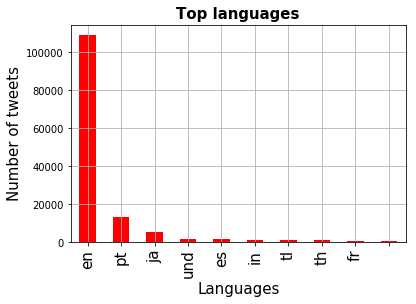

In [17]:
figC, axC = plt.subplots()
axC.tick_params(axis='x', labelsize=15)
axC.tick_params(axis='y', labelsize=10)
axC.set_xlabel('Languages', fontsize=15)
axC.set_ylabel('Number of tweets' , fontsize=15)
axC.set_title('Top languages', fontsize=15, fontweight='bold')
tweets_by_lang[:10].plot(ax=axC, kind='bar', color='red')
plt.grid()
plt.show()

In [20]:
 x_pos = list(range(len(prg_langs))) 
width = 0.8

fig, ax = plt.subplots()

plt.bar(x_pos, tweets_by_prg_lang, width, alpha=1, color='g')

<Container object of 8 artists>

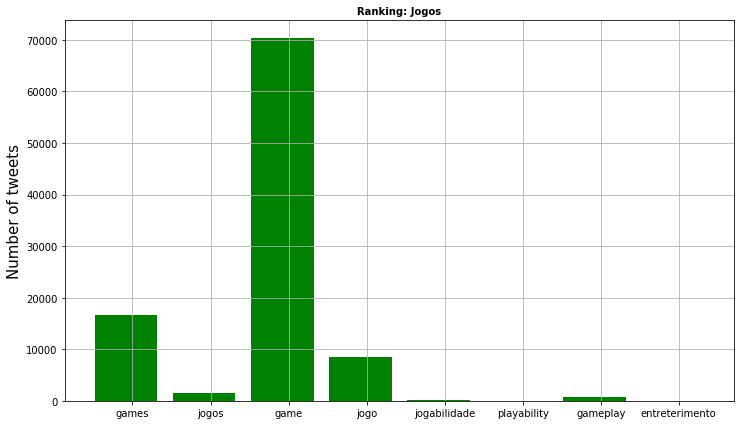

In [21]:
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Ranking: Jogos', fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.1 * width for p in x_pos])
ax.set_xticklabels(prg_langs)
plt.rcParams['figure.figsize'] = (20,7)
plt.grid()
plt.show()

In [5]:
from nltk.corpus import stopwords
import nltk

In [6]:
def remove_stopwords_english(words):
    return [word for word in words if word not in stopwords.words("english")]
def remove_stopwords_portuguese(words):
    return [word for word in words if word not in stopwords.words("portuguese")]
def remove_numbers_special_characters(words):
    nova_lista = []
    for palavra in words:
        nova_lista.append(re.sub(u'[^a-zA-Z0-9áéíóúÁÉÍÓÚâêîôÂÊÎÔãõÃÕçÇ: ]', ' ', palavra))

    return nova_lista
    
def remove_rt(words):
    return [word for word in words if word != "RT"]

In [7]:
def remove_repetidos(words):
    return set(words)

In [9]:
def limpa_lista(tweets):
    tweets_geral = []
    todas_palavras = []
    i =0
    # Quebra em uma lista de palavras
    for tweet in tweets:
        if(i<2000):
            words = tweet.split()
            tweets_new = remove_stopwords_english(words)
            tweets_new = remove_stopwords_portuguese(tweets_new)
            tweets_new = remove_numbers_special_characters(tweets_new)
            tweets_new = remove_rt(tweets_new)
            tweets_geral.append(tweets_new)
            i+=1
        else:
            break
    
    print(todas_palavras)
    return tweets_geral
    

In [10]:
def todas_palavras(words):
    todas_palavras = []
    for p in words:
        for word in p:
            todas_palavras.append(word)
    return todas_palavras

In [30]:
def produto_cartesiano(linha):
    i = 0
    for palavra in linha:
        palavra = palavra.lower()
        if(palavra == 'game' or palavra == 'games' or palavra == 'jogo' or palavra == 'jogos' or palavra == 'gameplay' or palavra == 'jogabilidade'):
            for word in linha:
                escreve_no_arquivo_txt(palavra+","+word)
        i+=1


In [14]:
listaNova = limpa_lista(tweets_text)
#print(listaNova)

[]


In [15]:
tudo = todas_palavras(listaNova)

#print (tudo)

In [16]:
setTudo = remove_repetidos(tudo)
tudo = list(setTudo)

In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JuniorF\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [32]:
def cria_arquivo_txt(nome, cabecalho):
    arquivo = open(nome+'.csv', 'w')
    arquivo.write(cabecalho)
    arquivo.close()

def escreve_no_arquivo_txt( data):
    arquivo = open('data.csv', 'a') 
    arquivo.write(data+', directed, 1'+'\n')
    
    arquivo.close()
def escreve_no_arquivo_node(data):
    arquivo2 = open('node.csv', 'a')
    arquivo2.write(data+'\n')
    arquivo2.close()
    
cria_arquivo_txt('data', 'Source, Target, Type, Weight'+'\n')
cria_arquivo_txt('node', 'Id,label'+'\n')

In [33]:
print(len(listaNova))

2000


In [34]:
for linha in listaNova:
    try:
        produto_cartesiano(linha)
    except:
        continue
    
    

In [22]:
i = 0
for palavra in tudo:
    escreve_no_arquivo_node(palavra+","+palavra)
    i+=1
    